# 宿題 (次回の授業開始時までに提出)

###  下側エンベロープを求めよう
$n$個の関数$f_1(x), f_2(x), \ldots , f_n(x)$に対して，各$x$で最小値をとる関数
$g(x)=\min_{i=1, \ldots , n} f_i(x)$は
**下側エンベロープ**と呼ばれる．

2つの区分的線形関数の下側エンベロープは次のlower_envelope_of_twoで求めることができる．
ただし，定義域は$[0,1]$とする．

In [45]:
def cross_point(xa1,xa2,ya1,ya2,xb1,xb2,yb1,yb2):
    '''
    input: 線形区分([xa1,xa2], [ya1,ya2]), ([xb1,xb2],[yb1,yb2])
    output: 2つの区分が交差するときそのx座標，交差しないときはNone
    '''
    ga=(ya1-ya2)/(xa1-xa2)
    gb=(yb1-yb2)/(xb1-xb2)
    if ga-gb == 0:
        return None
    x=(ga*xa1-ya1-gb*xb1+yb1)/(ga-gb)
    if xa1 <= x <= xa2 and xb1 <= x <= xb2:
        return x
    else:
        return None
    
def yval(xa1,xa2,ya1,ya2,x):
    '''
    input: 線形区分([xa1,xa2], [ya1,ya2])とx
    output: xでの関数値
    '''
    """if xa1 == xa2:
      return ya1"""
    ga=(ya1-ya2)/(xa1-xa2)
    return ga*(x-xa1)+ya1

def lower_envelope_of_two(f,g):
    '''
    input: 区分線形関数 f,g
    output: fとgの下側エンベロープ
    '''
    x = [0]
    fx,gx =f[1][0],g[1][0]
    y = [min(fx,gx)]

    i,j = 1,1    
    while i < len(f[0]) and j < len(g[0]):
        if f[0][i] < g[0][j]:
            x_next=f[0][i]
        else:
            x_next=g[0][j]

        f_next=yval(f[0][i-1],f[0][i],f[1][i-1],f[1][i],x_next)
        g_next=yval(g[0][j-1],g[0][j],g[1][j-1],g[1][j],x_next)
        
        if (fx-gx)*(f_next-g_next) < 0:
            x_c=cross_point(f[0][i-1],f[0][i],f[1][i-1],f[1][i],g[0][j-1],g[0][j],g[1][j-1],g[1][j])
            x.append(x_c)
            y.append(yval(f[0][i-1],f[0][i],f[1][i-1],f[1][i],x_c))
                     
        if f[0][i] < g[0][j]:
            i += 1
        else:
            j += 1
        x.append(x_next)
        y.append(min(f_next,g_next))
        fx,gx = f_next,g_next
            
    return [x,y]

lower_envelope_of_twoは次のように実行できる．

関数1 [[0.0, 0.1, 0.2, 0.30000000000000004, 0.4], [1, -1, 1, -1, 1]]
関数2 [[0.0, 0.1, 0.2, 0.30000000000000004, 0.4], [-0.5, 0.5, -0.5, 0.5, -0.5]]
下側エンベロープ [[0, 0.05, 0.1, 0.1, 0.15, 0.2, 0.2, 0.25, 0.30000000000000004, 0.30000000000000004, 0.35000000000000003, 0.4], [-0.5, 0.0, -1.0, -1.0, -2.220446049250313e-16, -0.5, -0.5, 5.551115123125783e-16, -1.0, -1.0, 0.0, -0.5]]


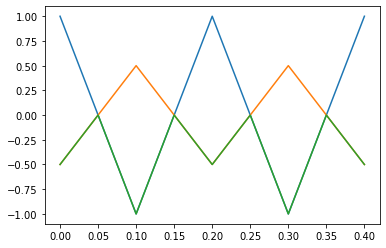

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x=[0.1*i for i in range(5)]
ya=[ (-1)**i for i in range(len(x))]
yb=[ (-1)**(i-1)*0.5 for i in range(len(x))]
print("関数1",[x,ya])
print("関数2",[x,yb])
plt.plot(x,ya)
plt.plot(x,yb)

le=lower_envelope_of_two([x,ya],[x,yb])
print("下側エンベロープ",le)
plt.plot(le[0],le[1])


### 課題: 次の直線集合linesの下側エンベロープを以下の2通りの方法で計算し，その実行時間を比較せよ．
- 方法1: まず$g_2(x)=\min \{ f_1(x), f_2(x)\}$を計算し， 次に$g_3(x)= \min \{ g_2(x), f_3(x)\}$, $g_4(x)= \min \{ g_3(x), f_4(x)\}$と順番に計算していく方法
- 方法2: 分割統治法による計算

100
[[[0, 1], [0.25, 1.25]], [[0, 1], [0.25010000000000004, 1.2301]], [[0, 1], [0.2504, 1.2104]], [[0, 1], [0.2509, 1.1909]], [[0, 1], [0.2516, 1.1716]], [[0, 1], [0.2525, 1.1525]], [[0, 1], [0.2536, 1.1336]], [[0, 1], [0.2549, 1.1149]], [[0, 1], [0.2564, 1.0964]], [[0, 1], [0.2581, 1.0781]], [[0, 1], [0.25999999999999995, 1.06]], [[0, 1], [0.2621, 1.0421]], [[0, 1], [0.2644, 1.0244]], [[0, 1], [0.26689999999999997, 1.0069]], [[0, 1], [0.2696, 0.9896]], [[0, 1], [0.2725, 0.9724999999999999]], [[0, 1], [0.2756, 0.9556]], [[0, 1], [0.27890000000000004, 0.9389]], [[0, 1], [0.2824, 0.9224]], [[0, 1], [0.28609999999999997, 0.9060999999999999]], [[0, 1], [0.29000000000000004, 0.89]], [[0, 1], [0.2941, 0.8741000000000001]], [[0, 1], [0.29839999999999994, 0.8584]], [[0, 1], [0.30289999999999995, 0.8429]], [[0, 1], [0.3076, 0.8276]], [[0, 1], [0.3125, 0.8125]], [[0, 1], [0.3176, 0.7976]], [[0, 1], [0.32289999999999996, 0.7828999999999999]], [[0, 1], [0.3284, 0.7684]], [[0, 1], [0.33409999999999

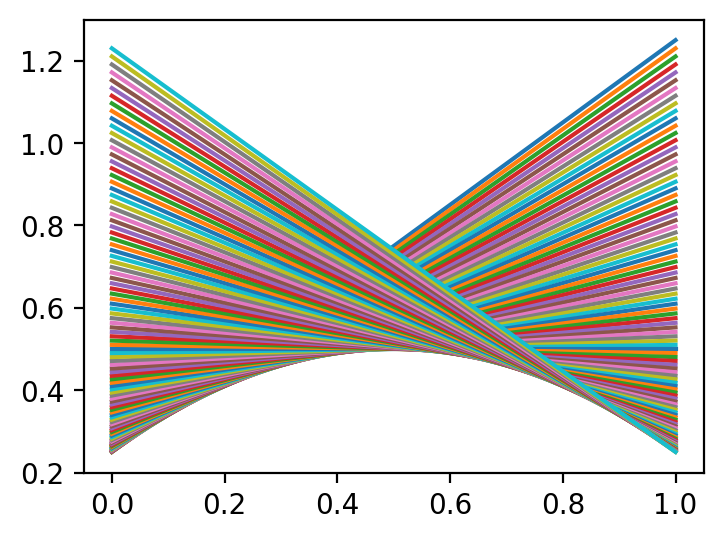

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3),dpi=200)

n=100
lines=[]
for i in range(n):
    x = i/n
    y=(1/2)-(x-1/2)**2
    g=-2*(x-1/2)
    y0=y-g*x
    y1=y0+g
    
    lines.append([[0,1],[y0,y1]])

for i in range(n):
    plt.plot(lines[i][0],lines[i][1])

print(len(lines))
print(lines)

#### 方法1

In [4]:
def lower_envelope_of_lines(lines):
    return
%time le=lower_envelope_of_lines(lines)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


#### 方法2

In [23]:
[[0,1], [1,0]] + [[0,1], [0.5, 0.5]]

[[0, 1], [1, 0], [0, 1], [0.5, 0.5]]

In [157]:
def divide_and_conquer(lines,a,b):
  if len(lines) == 1:
    return lines[0]
  elif len(lines) == 2:
    return lower_envelope_of_two(lines[0], lines[1])
  else:
    mid = (len(lines)-1)//2
    left = divide_and_conquer(lines[:mid], a, mid)
    right = divide_and_conquer(lines[mid:], mid, b)
    """
    print(left)
    print(right)
    print(lower_envelope_of_two(left, right))
    """
    return lower_envelope_of_two(left, right)
%time leb=divide_and_conquer(lines,0,len(lines)-1)

CPU times: user 1.46 ms, sys: 0 ns, total: 1.46 ms
Wall time: 1.41 ms


In [41]:
lines = [0,1,2,3]
lines[:len(lines)//2]

[0, 1]

In [51]:
def divide_and_conquer(lines,a,b):
  #if len(lines) == 1:
  if a+1 == b:
    #print("a = ", a, "  b = ", b, "  lines = ", lines)
    return lines[0]
  else:
    #mid = len(lines)//2
    mid = (a+b+1)//2
    #print(a, mid, b, "  ", len(lines), len(lines[:mid]), len(lines[mid:]))
    left = divide_and_conquer(lines[:(mid-a)], a, mid) #midよりも小さい
    right = divide_and_conquer(lines[(mid-a):], mid, b) #mid以上
    #print("left = ", left, "  right = ", right)
    return lower_envelope_of_two(left, right)
%time leb=divide_and_conquer(lines,0,len(lines)-1)

CPU times: user 1.7 ms, sys: 0 ns, total: 1.7 ms
Wall time: 1.6 ms


In [52]:
#鷹野由利香さんのやつ
def divide_and_conquer(lines,a,b):
    if a==b:
        return lines[a]
    mid=(b-a)//2+a
    #print(mid)
    former=divide_and_conquer(lines,a,mid)
    latter=divide_and_conquer(lines,mid+1,b)
    
    return lower_envelope_of_two(former,latter)
%time leb=divide_and_conquer(lines,0,len(lines)-1)

CPU times: user 1.13 ms, sys: 0 ns, total: 1.13 ms
Wall time: 1.13 ms


関数1 [[0.0, 0.1, 0.2, 0.30000000000000004, 0.4], [1, -1, 1, -1, 1]]
関数2 [[0.0, 0.1, 0.2, 0.30000000000000004, 0.4], [-0.5, 0.5, -0.5, 0.5, -0.5]]
関数3 [[0.0, 0.1, 0.2, 0.30000000000000004, 0.4], [-0.25, 0.5, -1.0, 2.0, -4.0]]


ZeroDivisionError: ignored

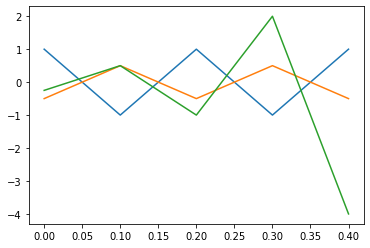

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

x=[0.1*i for i in range(5)]
ya=[ (-1)**i for i in range(len(x))]
yb=[ (-1)**(i-1)*0.5 for i in range(len(x))]
yc=[ (-2)**(i-1)*0.5 for i in range(len(x))]
print("関数1",[x,ya])
print("関数2",[x,yb])
print("関数3",[x,yc])
plt.plot(x,ya)
plt.plot(x,yb)
plt.plot(x,yc)

#le=divide_and_conquer([[x,ya],[x,yb]], min(x), max(x))
#le=divide_and_conquer([[x,ya]], min(x), max(x))
le=divide_and_conquer([[x,ya],[x,yb],[x,yc]], min(x), max(x))
print("下側エンベロープ",le)
plt.plot(le[0],le[1])

下側エンベロープ [[0, 0.005000000000002443, 0.014999999999998334, 0.02500000000000111, 0.03499999999999753, 0.04500000000000105, 0.055000000000001, 0.06500000000000075, 0.07500000000000041, 0.08500000000000031, 0.09499999999999884, 0.10500000000000222, 0.11499999999999984, 0.12499999999999861, 0.13500000000000167, 0.14499999999999777, 0.15499999999999944, 0.16500000000000112, 0.17499999999999624, 0.18499999999999786, 0.19500000000000442, 0.20499999999999666, 0.21499999999999833, 0.22500000000000153, 0.23500000000000165, 0.24500000000000055, 0.25499999999999945, 0.26499999999999835, 0.275000000000002, 0.2849999999999977, 0.29500000000000054, 0.3049999999999986, 0.3150000000000039, 0.32499999999999724, 0.3349999999999989, 0.34499999999999775, 0.35500000000000126, 0.36500000000000316, 0.3749999999999974, 0.3850000000000017, 0.39500000000000113, 0.405, 0.415, 0.42499999999999605, 0.4350000000000014, 0.44500000000000056, 0.45500000000000007, 0.4650000000000009, 0.4749999999999977, 0.485000000000000

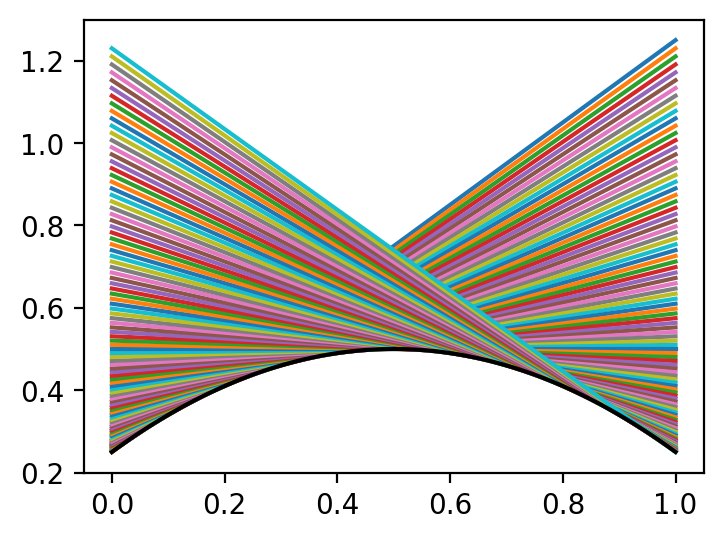

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3),dpi=200)

n=100
lines=[]
for i in range(n):
    x = i/n
    y=(1/2)-(x-1/2)**2
    g=-2*(x-1/2)
    y0=y-g*x
    y1=y0+g
    
    lines.append([[0,1],[y0,y1]])

le = divide_and_conquer(lines, 0, len(lines)-1)
print("下側エンベロープ", le)
print(len(le))

for i in range(n):
  plt.plot(lines[i][0],lines[i][1])
plt.plot(le[0], le[1], color="black")